---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Quiz 3, question 5 code

print(len(X_test))
print(m)
print("X_test shape: {}".format(X_test.shape))
y_predicted = m.predict(X_test)
print("y_predicted.shape: {}".format(y_predicted.shape))
print("y_test.shape: {}".format(y_test.shape))

from sklearn.metrics import precision_recall_curve

y_scores = m.decision_function(X_test)

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

prec_vs_rec = list(zip(precision, recall))

#print(('precision', 'recall'))
#for s in prec_vs_rec:
#  print(s)
#print(recall)
print(np.argmin(recall > 0.8))

ix_below = np.argmin(recall > 0.8)
ix_above = ix_below - 1

print(ix_above, ix_below)

print('Closest recalls: {}'.format(recall[[ix_above, ix_below]]))
print('Closest prec-ns: {}'.format(precision[[ix_above, ix_below]]))
print('Approximate prec-n: {}'.format((precision[[ix_above, ix_below]].mean())))

print("the end");



# Q8
print(m)

from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score

m_predicted = m.predict(X_test)


print('Macro-averaged precision = {:.2f} (treat classes equally)'
      .format(precision_score(y_test, m_predicted, average = 'macro')))


# q13

print(m)

param_range = [0.01, 0.1, 1, 10]
grid_values = {'gamma': param_range,
               'c': param_range}

print(grid_values)

#from sklearn.model_selection import GridSearchCV
# alternative metric to optimize over grid parameters: recall

#gs = GridSearchCV(m, param_grid = grid_values, scoring = 'recall')
gs = GridSearchCV(m, param_grid = grid_values, scoring = 'roc_auc')
gs.fit(X_train, y_train)
print(gs)

print(type(gs))





# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [3]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [4]:
def answer_one():
    
    # Your code here
    df = pd.read_csv('fraud_data.csv')
    fraud_share = df['Class'].sum()/len(df['Class'])
    return fraud_share

answer_one()

0.016410823768035772

In [5]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [6]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import accuracy_score, recall_score
    
    # Your code here

    # Negative class (0) is most frequent
    dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
    # Therefore the dummy 'most_frequent' classifier always predicts class 0
    y_dummy_predictions = dummy_majority.predict(X_test)

    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    accuracy = accuracy_score(y_test, y_dummy_predictions)
    recall = recall_score(y_test, y_dummy_predictions)

    return (accuracy, recall)# Return your answer

answer_two()

(0.98525073746312686, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [7]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC

    # Your code here
    svm = SVC(kernel='rbf', C=1).fit(X_train, y_train)
    #svm.score(X_test, y_test)
    return (svm.score(X_test, y_test),
            recall_score(y_test, svm.predict(X_test)),
            precision_score(y_test, svm.predict(X_test)))

answer_three()

(0.99078171091445433, 0.375, 1.0)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [19]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC

    # Your code here
    params = {
              'C': 1e9,
              'gamma': 1e-07
             }

    svm = SVC(**params).fit(X_train, y_train)

    svm_decisions = svm.decision_function(X_test)
    threshold = -220
    y_predicted = (svm_decisions > threshold)
    return confusion_matrix(y_true=y_test, y_pred=y_predicted)

answer_four()

[LibSVM]

array([[5320,   24],
       [  14,   66]])

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

In [38]:
def answer_five():
        
    # Your code here
    from sklearn.linear_model import LogisticRegression

    lr = LogisticRegression().fit(X_train, y_train)
    lr_predicted = lr.predict(X_test)
    y_score_lr = lr.decision_function(X_test)


    from sklearn.metrics import precision_recall_curve


    precision, recall, thresholds = precision_recall_curve(y_test, y_score_lr)
    # Looking at the precision recall curve, what is the recall when the precision is `0.75`?

    r1 = recall[np.abs(precision-0.75).argmin()]


    from sklearn.metrics import roc_curve

    fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)

    tpr1 = tpr_lr[np.abs(fpr_lr-0.16).argmin()]

    return (r1, tpr1)

answer_five()

(0.82499999999999996, 0.9375)

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array.*

In [64]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression

    # Your code here
    lr = LogisticRegression().fit(X_train, y_train)

    grid_values = {'C':[0.01, 0.1, 1, 10, 100],
                    'penalty':['l1', 'l2']}

    gs = GridSearchCV(lr,
                      param_grid = grid_values,
                      cv=3,
                      scoring='recall'
                     )

    gs.fit(X_train, y_train)

    #gs.cv_results_['params']
    #gs.cv_results_['mean_test_score']
    return gs.cv_results_['mean_test_score'].reshape(5, 2)

answer_six()

array([[ 0.66666667,  0.76086957],
       [ 0.80072464,  0.80434783],
       [ 0.8115942 ,  0.8115942 ],
       [ 0.80797101,  0.8115942 ],
       [ 0.80797101,  0.80797101]])

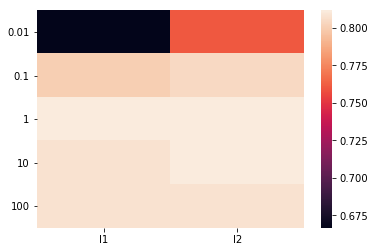

In [67]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib inline
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores, xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

#GridSearch_Heatmap(answer_six())